In [17]:
pip install rasterio pandas

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install geopandas contextily

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install geopandas rasterio shapely geopy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.decomposition import PCA
from ipywidgets import interact
import numpy as np
import rasterio
import pandas as pd
import os
from sklearn.cluster import KMeans
import contextily as ctx
import pandas as pd
import geopandas as gpd
from rasterio.transform import from_origin
from rasterio.features import shapes
import geopandas as gpd
from shapely.geometry import shape, LineString, Point
from shapely.ops import nearest_points
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [22]:
# import numpy as np
# import matplotlib.pyplot as plt
# import geopandas as gpd

# # Plot the points and polylines with points colored by the "Type" column
# fig, ax = plt.subplots(figsize=(10, 10))
# polylines_gdf.plot(ax=ax, color='k')
# points_gdf.plot(ax=ax, column='Type', legend=True, markersize=5, cmap='tab10')
# plt.title('All Mineral Occurrences and Boundaries')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()

# # Step 4: Create separate CDF plots for each deposit type
# types = points_gdf['Type'].unique()

# # Create subplots with 2 columns and 3 rows
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
# axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# for i, deposit_type in enumerate(types):
#     if i >= len(axes):
#         break  # If there are more types than subplots, stop plotting
#     ax = axes[i]
#     subset = points_gdf[points_gdf['Type'] == deposit_type]
#     distances = (subset['DISTVSH2'].values) / 1000  # Convert distances to kilometers
#     distances.sort()
    
#     cdf = np.arange(len(distances)) / float(len(distances))
    
#     ax.plot(distances, cdf, marker='.', linestyle='none', label=deposit_type)
#     ax.set_xlabel('Distance from Boundaries (km)')
#     ax.set_ylabel('Cumulative frequency (%)')
#     ax.set_title(f'CDF for {deposit_type}')
#     ax.grid(True)
#     ax.legend()

# plt.tight_layout()  # Adjust subplots to fit into figure area.
# plt.show()

In [23]:
# # Exclude "Magmatic_Ni" and "VMS" types
# excluded_types = ["Magmatic_Ni", "VMS", "IOCG"]
# points_gdf_e = points_gdf[~points_gdf['Type'].isin(excluded_types)]

# # Plot the points and polylines
# fig, ax = plt.subplots(figsize=(10, 10))
# polylines_gdf.plot(ax=ax, color='k')
# points_gdf_e.plot(ax=ax, color='red', markersize=5)
# plt.title('PbZn_CD, PbZn_MVT, Cu_Sed')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()

# # Step 4: Create a CDF plot of the nearest distances
# distances = (points_gdf_e['DISTVSH2'].values)/1000
# distances.sort()

# cdf = np.arange(len(distances)) / float(len(distances))

# plt.figure(figsize=(10, 6))
# plt.plot(distances, cdf, marker='.', linestyle='none')
# plt.xlabel('Distance from Boundaries (km)')
# plt.ylabel('Cumulative frequency (%)')
# plt.title('CDF for PbZn_CD, PbZn_MVT, Cu_Sed')
# plt.grid(True)
# plt.show()



# Weighted CDF

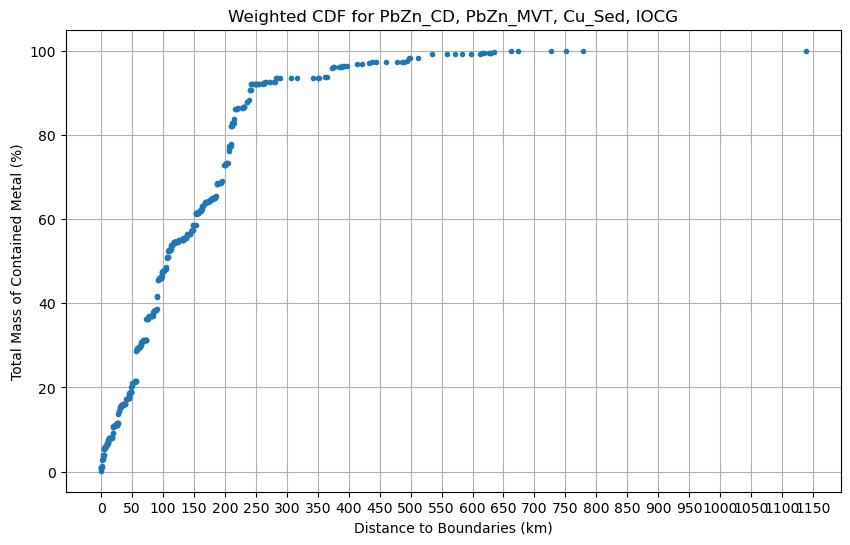

In [24]:

# Load the polylines and points with distances

points_path = './Datasets/Output/All_Deposits.shp'

points_gdf = gpd.read_file(points_path)

# Ensure all geometries are valid
points_gdf = points_gdf[points_gdf.is_valid]

# Exclude "Magmatic_Ni" and "VMS" types
excluded_types = ["Magmatic_Ni", "VMS"]
points_gdf_e = points_gdf[~points_gdf['Type'].isin(excluded_types)]

# Extract relevant data
points_gdf_e = points_gdf_e.dropna(subset=['Ore__Mt_', 'DIST4'])
ore_values = points_gdf_e['Ore__Mt_'].values
distances = (points_gdf_e['DIST4'].values)/1000

# Sort by distances
sorted_indices = np.argsort(distances)
distances_sorted = distances[sorted_indices]
ore_values_sorted = ore_values[sorted_indices]

# Calculate the cumulative sum of ore values
cumulative_ore = np.cumsum(ore_values_sorted)

# Normalize to get the percentage
total_ore = cumulative_ore[-1]
cdf_percentage = (cumulative_ore / total_ore) * 100

# # Plot the CDF
# plt.figure(figsize=(10, 6))
# plt.plot(distances_sorted, cdf_percentage, marker='.', linestyle='none')
# plt.xlabel('Distance to Boundaries (km)')
# plt.ylabel('Total Mass of Contained Metal (%)')
# plt.title('Weighted CDF for PbZn_CD, PbZn_MVT, Cu_Sed')
# plt.grid(True)
# plt.show()

# Plot the CDF with x-axis intervals of 20 units
plt.figure(figsize=(10, 6))
plt.plot(distances_sorted, cdf_percentage, marker='.', linestyle='none')
plt.xticks(np.arange(0, max(distances_sorted) + 50, 50))
plt.xlabel('Distance to Boundaries (km)')
plt.ylabel('Total Mass of Contained Metal (%)')
plt.title('Weighted CDF for PbZn_CD, PbZn_MVT, Cu_Sed, IOCG')
plt.grid(True)
plt.show()

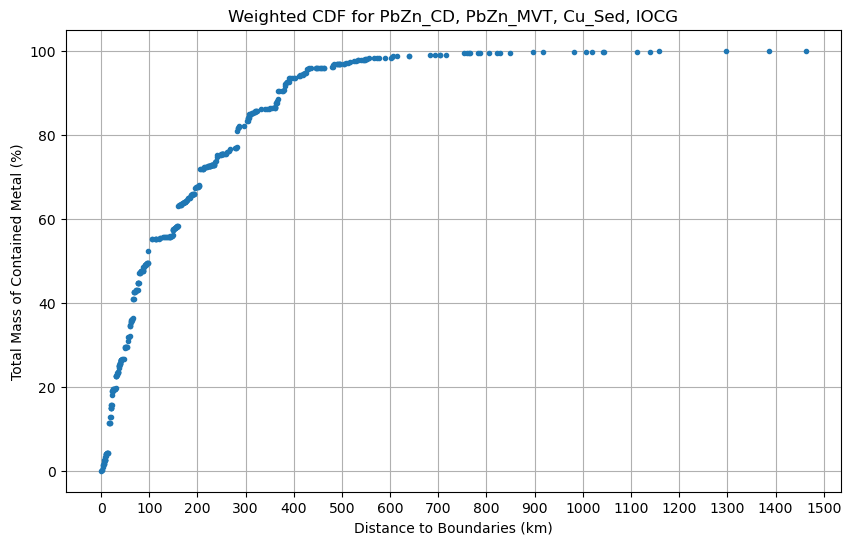

In [25]:

# Load the polylines and points with distances

points_path = './Datasets/Output/All_Deposits.shp'

points_gdf = gpd.read_file(points_path)

# Ensure all geometries are valid
points_gdf = points_gdf[points_gdf.is_valid]

# Exclude "Magmatic_Ni" and "VMS" types
excluded_types = ["Magmatic_Ni", "VMS"]
points_gdf_e = points_gdf[~points_gdf['Type'].isin(excluded_types)]

# Extract relevant data
points_gdf_e = points_gdf_e.dropna(subset=['Ore__Mt_', 'DIST3'])
ore_values = points_gdf_e['Ore__Mt_'].values
distances = (points_gdf_e['DIST3'].values)/1000

# Sort by distances
sorted_indices = np.argsort(distances)
distances_sorted = distances[sorted_indices]
ore_values_sorted = ore_values[sorted_indices]

# Calculate the cumulative sum of ore values
cumulative_ore = np.cumsum(ore_values_sorted)

# Normalize to get the percentage
total_ore = cumulative_ore[-1]
cdf_percentage = (cumulative_ore / total_ore) * 100

# # Plot the CDF
# plt.figure(figsize=(10, 6))
# plt.plot(distances_sorted, cdf_percentage, marker='.', linestyle='none')
# plt.xlabel('Distance to Boundaries (km)')
# plt.ylabel('Total Mass of Contained Metal (%)')
# plt.title('Weighted CDF for PbZn_CD, PbZn_MVT, Cu_Sed')
# plt.grid(True)
# plt.show()

# Plot the CDF with x-axis intervals of 20 units
plt.figure(figsize=(10, 6))
plt.plot(distances_sorted, cdf_percentage, marker='.', linestyle='none')
plt.xticks(np.arange(0, max(distances_sorted) + 100, 100))
plt.xlabel('Distance to Boundaries (km)')
plt.ylabel('Total Mass of Contained Metal (%)')
plt.title('Weighted CDF for PbZn_CD, PbZn_MVT, Cu_Sed, IOCG')
plt.grid(True)
plt.show()

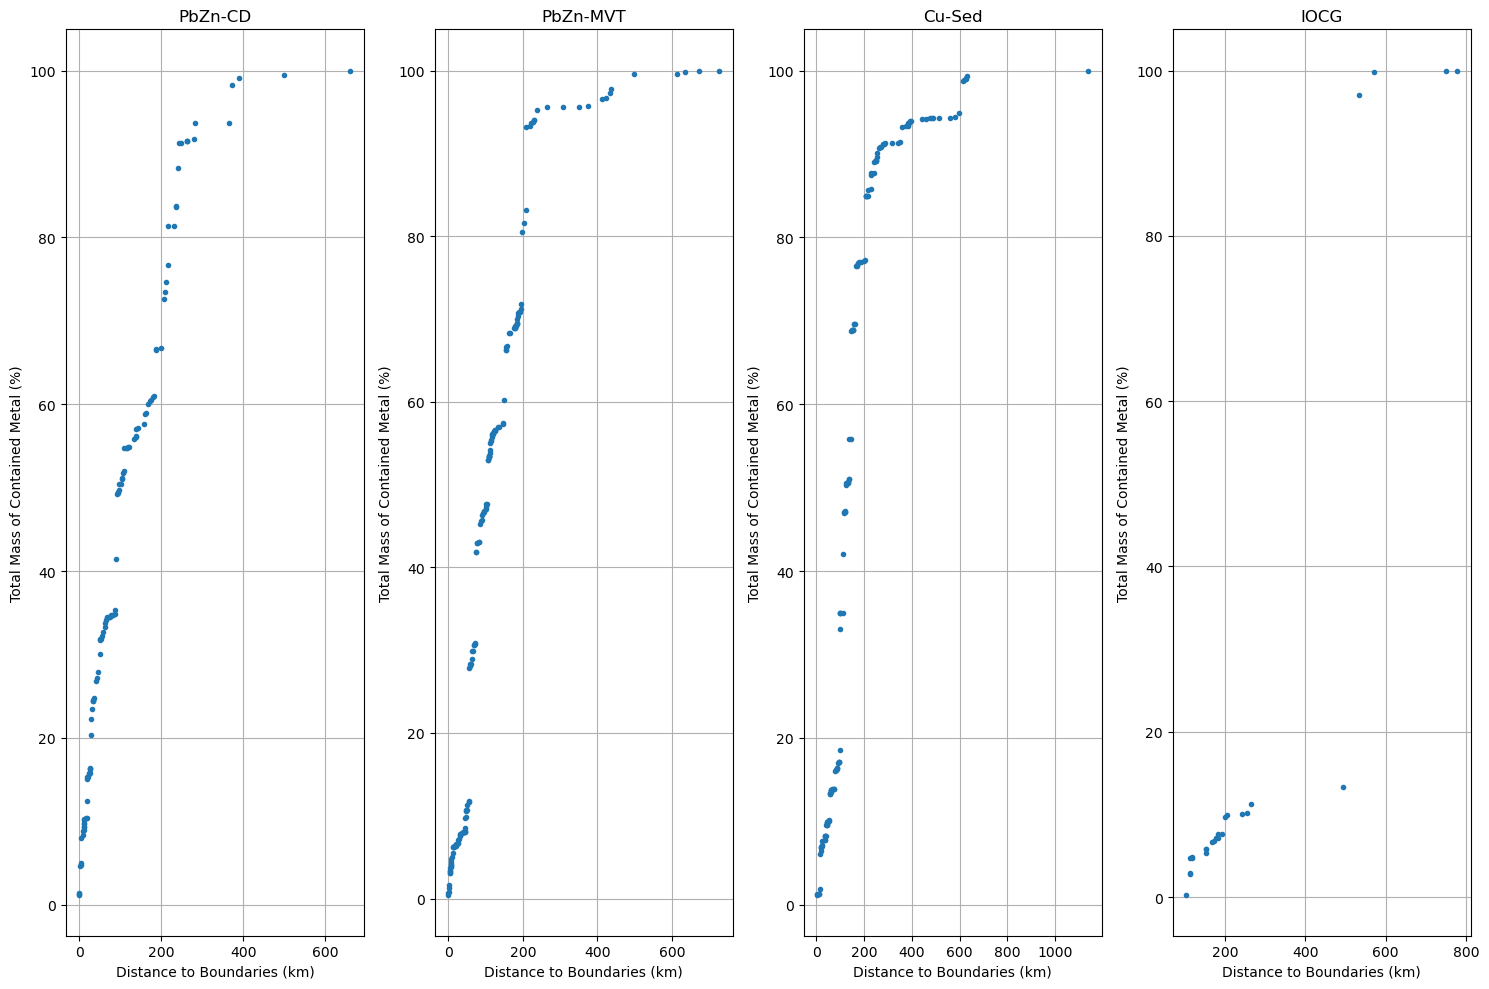

In [26]:
# Replace NaN and zero values in 'Ore__Mt_' with 0.1
points_gdf_e['Ore__Mt_'] = points_gdf_e['Ore__Mt_'].fillna(0.1)
points_gdf_e.loc[points_gdf_e['Ore__Mt_'] == 0, 'Ore__Mt_'] = 0.1


# Prepare and plot CDF for each deposit type
types = points_gdf_e['Type'].unique()

# Create subplots with 2 columns and 2 rows
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

for i, deposit_type in enumerate(types):
    if i >= len(axes):
        break  # If there are more types than subplots, stop plotting
    ax = axes[i]
    # Filter the data for the current deposit type
    subset = points_gdf_e[points_gdf_e['Type'] == deposit_type].dropna(subset=['DIST4'])
    
    if subset.empty:
        continue  # Skip if there are no valid data points for the current deposit type

    ore_values = subset['Ore__Mt_'].values
    distances = subset['DIST4'].values

    # Sort by distances
    sorted_indices = np.argsort(distances)
    distances_sorted = distances[sorted_indices] / 1000  # Convert distances to kilometers
    ore_values_sorted = ore_values[sorted_indices]

    # Calculate the cumulative sum of ore values
    cumulative_ore = np.cumsum(ore_values_sorted)

    # Normalize to get the percentage
    total_ore = cumulative_ore[-1]
    if total_ore == 0:
        continue  # Skip if the total ore is zero to avoid division by zero

    cdf_percentage = (cumulative_ore / total_ore) * 100

    
    # Plot the CDF for the current deposit type
    ax.plot(distances_sorted, cdf_percentage, marker='.', linestyle='none')
    ax.set_xlabel('Distance to Boundaries (km)')
    ax.set_ylabel('Total Mass of Contained Metal (%)')
    ax.set_title(f'{deposit_type}')
    ax.grid(True)


# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

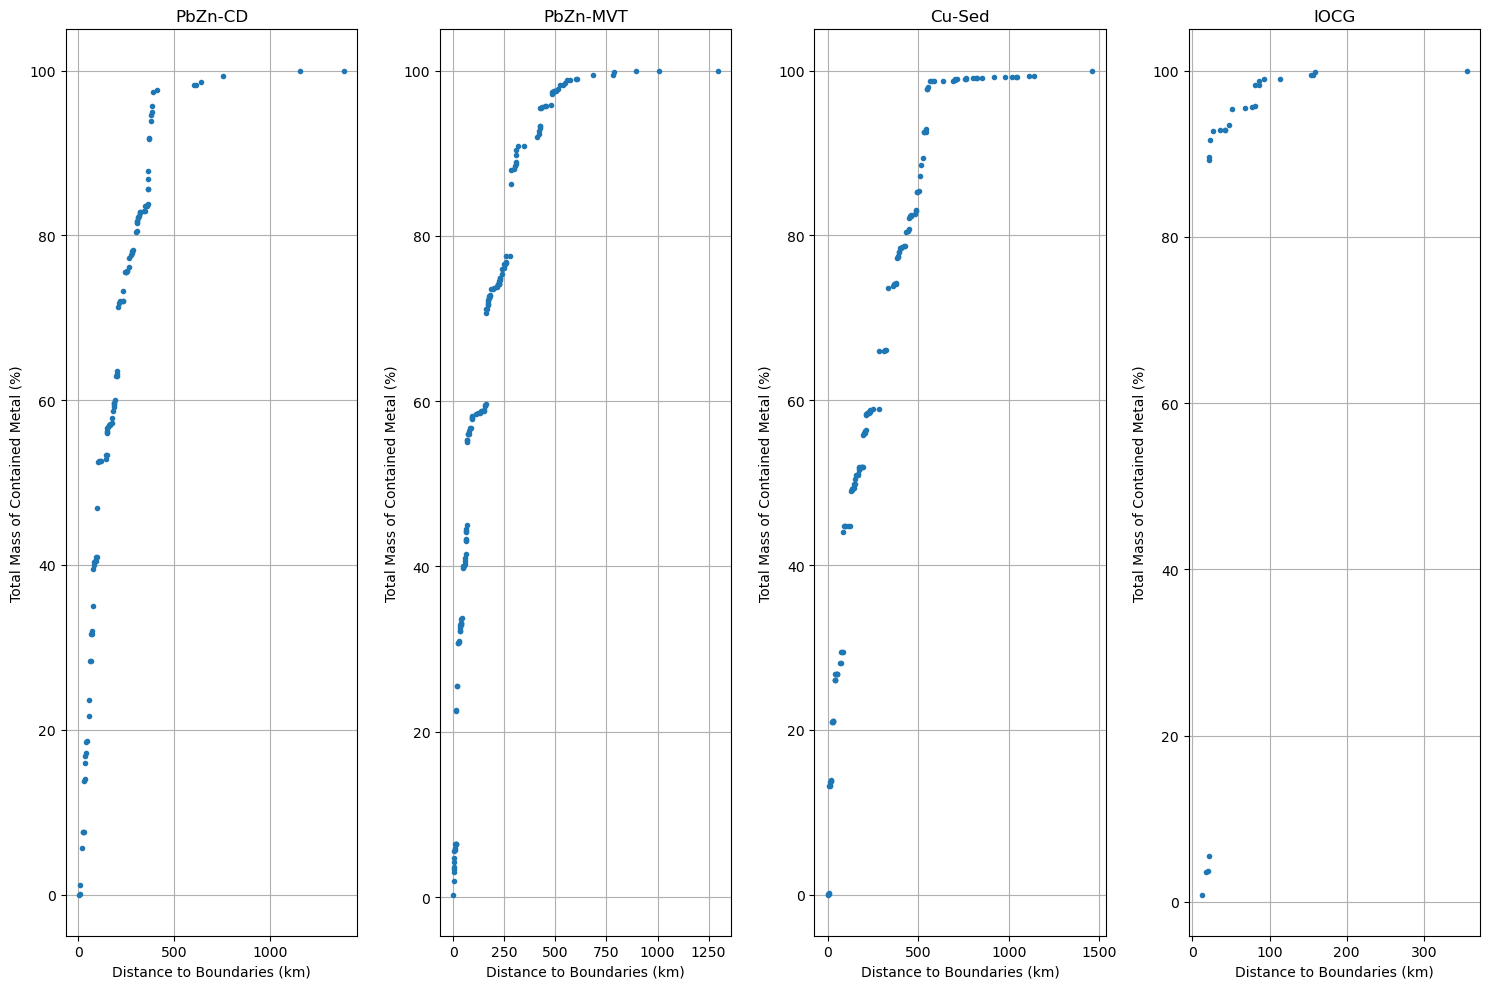

In [27]:
# Replace NaN and zero values in 'Ore__Mt_' with 0.1
points_gdf_e['Ore__Mt_'] = points_gdf_e['Ore__Mt_'].fillna(0.1)
points_gdf_e.loc[points_gdf_e['Ore__Mt_'] == 0, 'Ore__Mt_'] = 0.1


# Prepare and plot CDF for each deposit type
types = points_gdf_e['Type'].unique()

# Create subplots with 2 columns and 2 rows
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

for i, deposit_type in enumerate(types):
    if i >= len(axes):
        break  # If there are more types than subplots, stop plotting
    ax = axes[i]
    # Filter the data for the current deposit type
    subset = points_gdf_e[points_gdf_e['Type'] == deposit_type].dropna(subset=['DIST3'])
    
    if subset.empty:
        continue  # Skip if there are no valid data points for the current deposit type

    ore_values = subset['Ore__Mt_'].values
    distances = subset['DIST3'].values

    # Sort by distances
    sorted_indices = np.argsort(distances)
    distances_sorted = distances[sorted_indices] / 1000  # Convert distances to kilometers
    ore_values_sorted = ore_values[sorted_indices]

    # Calculate the cumulative sum of ore values
    cumulative_ore = np.cumsum(ore_values_sorted)

    # Normalize to get the percentage
    total_ore = cumulative_ore[-1]
    if total_ore == 0:
        continue  # Skip if the total ore is zero to avoid division by zero

    cdf_percentage = (cumulative_ore / total_ore) * 100

    
    # Plot the CDF for the current deposit type
    ax.plot(distances_sorted, cdf_percentage, marker='.', linestyle='none')
    ax.set_xlabel('Distance to Boundaries (km)')
    ax.set_ylabel('Total Mass of Contained Metal (%)')
    ax.set_title(f'{deposit_type}')
    ax.grid(True)


# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

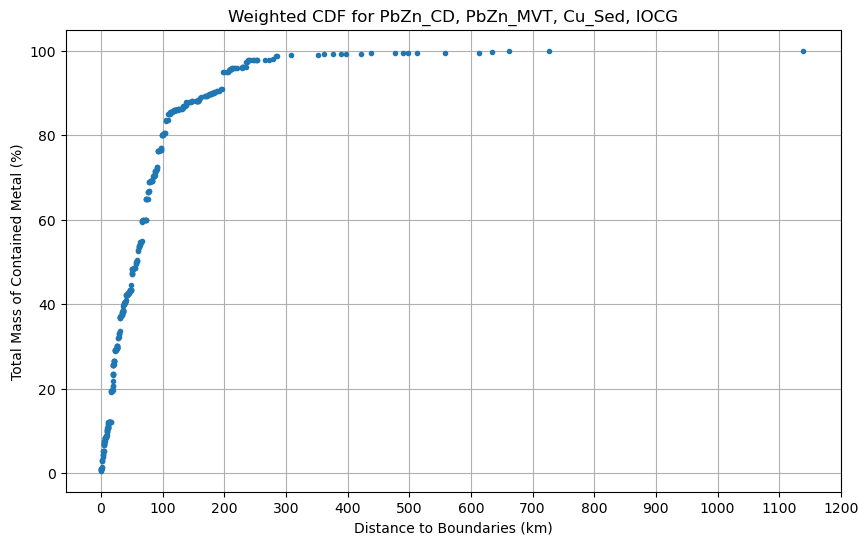

In [37]:

# Load the polylines and points with distances

points_path = './Datasets/Output/All_Deposits.shp'

points_gdf = gpd.read_file(points_path)

# Ensure all geometries are valid
points_gdf = points_gdf[points_gdf.is_valid]

# Exclude "Magmatic_Ni" and "VMS" types
excluded_types = ["Magmatic_Ni", "VMS"]
points_gdf_e = points_gdf[~points_gdf['Type'].isin(excluded_types)]

# Extract relevant data
points_gdf_e = points_gdf_e.dropna(subset=['Ore__Mt_', 'DIST34'])
ore_values = points_gdf_e['Ore__Mt_'].values
distances = (points_gdf_e['DIST34'].values)/1000

# Sort by distances
sorted_indices = np.argsort(distances)
distances_sorted = distances[sorted_indices]
ore_values_sorted = ore_values[sorted_indices]

# Calculate the cumulative sum of ore values
cumulative_ore = np.cumsum(ore_values_sorted)

# Normalize to get the percentage
total_ore = cumulative_ore[-1]
cdf_percentage = (cumulative_ore / total_ore) * 100

# # Plot the CDF
# plt.figure(figsize=(10, 6))
# plt.plot(distances_sorted, cdf_percentage, marker='.', linestyle='none')
# plt.xlabel('Distance to Boundaries (km)')
# plt.ylabel('Total Mass of Contained Metal (%)')
# plt.title('Weighted CDF for PbZn_CD, PbZn_MVT, Cu_Sed')
# plt.grid(True)
# plt.show()

# Plot the CDF with x-axis intervals of 20 units
plt.figure(figsize=(10, 6))
plt.plot(distances_sorted, cdf_percentage, marker='.', linestyle='none')
plt.xticks(np.arange(0, max(distances_sorted) + 100, 100))
plt.xlabel('Distance to Boundaries (km)')
plt.ylabel('Total Mass of Contained Metal (%)')
plt.title('Weighted CDF for PbZn_CD, PbZn_MVT, Cu_Sed, IOCG')
plt.grid(True)
plt.show()

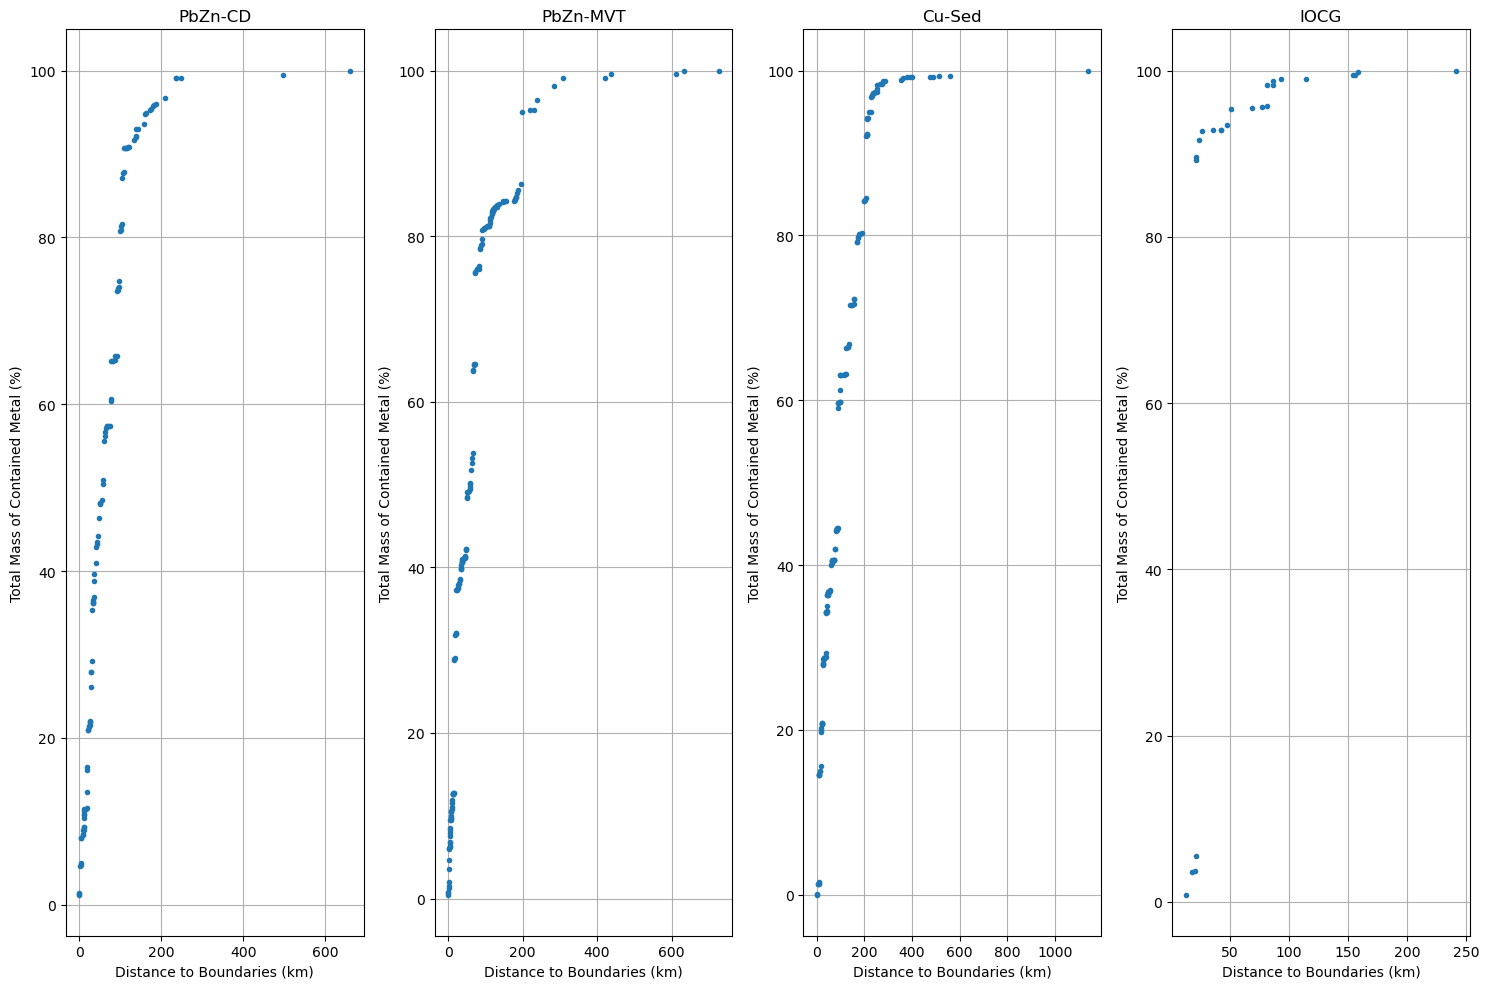

In [38]:
# Replace NaN and zero values in 'Ore__Mt_' with 0.1
points_gdf_e['Ore__Mt_'] = points_gdf_e['Ore__Mt_'].fillna(0.1)
points_gdf_e.loc[points_gdf_e['Ore__Mt_'] == 0, 'Ore__Mt_'] = 0.1


# Prepare and plot CDF for each deposit type
types = points_gdf_e['Type'].unique()

# Create subplots with 2 columns and 2 rows
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

for i, deposit_type in enumerate(types):
    if i >= len(axes):
        break  # If there are more types than subplots, stop plotting
    ax = axes[i]
    # Filter the data for the current deposit type
    subset = points_gdf_e[points_gdf_e['Type'] == deposit_type].dropna(subset=['DIST34'])
    
    if subset.empty:
        continue  # Skip if there are no valid data points for the current deposit type

    ore_values = subset['Ore__Mt_'].values
    distances = subset['DIST34'].values

    # Sort by distances
    sorted_indices = np.argsort(distances)
    distances_sorted = distances[sorted_indices] / 1000  # Convert distances to kilometers
    ore_values_sorted = ore_values[sorted_indices]

    # Calculate the cumulative sum of ore values
    cumulative_ore = np.cumsum(ore_values_sorted)

    # Normalize to get the percentage
    total_ore = cumulative_ore[-1]
    if total_ore == 0:
        continue  # Skip if the total ore is zero to avoid division by zero

    cdf_percentage = (cumulative_ore / total_ore) * 100

    
    # Plot the CDF for the current deposit type
    ax.plot(distances_sorted, cdf_percentage, marker='.', linestyle='none')
    ax.set_xlabel('Distance to Boundaries (km)')
    ax.set_ylabel('Total Mass of Contained Metal (%)')
    ax.set_title(f'{deposit_type}')
    ax.grid(True)


# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

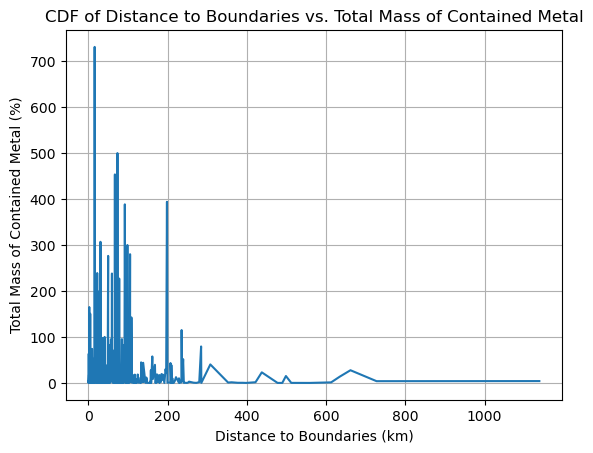

The CDF result has been saved to ./Datasets/cdf_result.xlsx


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# # Generate some example CDF data
# distances = np.linspace(0, 100, 100)
# total_mass = np.cumsum(np.random.rand(100))
# total_mass = total_mass / total_mass[-1] * 100  # Normalize to percentage

# Create a DataFrame with the CDF data
cdf_data = pd.DataFrame({
    'Distance to Boundaries (km)': distances_sorted,
    'Total Mass of Contained Metal (%)': ore_values_sorted
})

# Save the DataFrame to an Excel file
output_path = './Datasets/cdf_result.xlsx'
cdf_data.to_excel(output_path, index=False)

# Plotting the CDF (optional)
plt.plot(distances_sorted, ore_values_sorted)
plt.xlabel('Distance to Boundaries (km)')
plt.ylabel('Total Mass of Contained Metal (%)')
plt.title('CDF of Distance to Boundaries vs. Total Mass of Contained Metal')
plt.grid(True)
plt.show()

print(f"The CDF result has been saved to {output_path}")
